#Section1 : DATA CLEANING
1 : Importing the dataset

In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
#This lib is used for visualization
%matplotlib inline

In [225]:
data= pd.read_excel('main_data.xlsx')
data 

,town_id,turnout_total,turnout_male,turnout_female,registered_total,registered_male,registered_female,treatment,treatment_phase,turnout rate
0,237,655,353,302,-999,-999,-999,0,1,-65.565566
1,195,579,318,261,-999,-999,-999,1,1,-57.957958
2,213,572,338,234,-999,-999,-999,0,2,-57.257257
3,195,559,304,255,-999,-999,-999,0,1,-55.955956
4,175,557,291,266,-999,-999,-999,0,2,-55.755756
...,...,...,...,...,...,...,...,...,...,...
6965,213,286,155,131,286,155,131,1,1,100.000000
6966,213,579,313,266,579,313,266,1,2,100.000000
6967,213,633,347,286,633,347,286,0,2,100.000000
6968,235,460,240,220,460,240,220,0,1,100.000000


In [159]:
town_names = pd.read_excel('town_names.xlsx')

2: Merging the data set, dropping irrelevant towns

In [160]:
master_data = pd.merge(data,town_names, left_on= 'town_id', right_on= 'Town ID')
master_data

,town_id,turnout_total,turnout_male,turnout_female,registered_total,registered_male,registered_female,treatment,treatment_phase,turnout rate,Town ID,Town Name,district,District ID
0,237,655,353,302,-999,-999,-999,0,1,-65.565566,237,Araria,Araria,23
1,237,240,139,101,1743,1020,723,0,2,13.769363,237,Araria,Araria,23
2,237,281,157,124,1966,1005,961,1,1,14.292981,237,Araria,Araria,23
3,237,215,104,111,1479,804,675,1,1,14.536849,237,Araria,Araria,23
4,237,271,133,138,1718,981,737,1,1,15.774156,237,Araria,Araria,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6965,208,436,254,182,438,255,183,1,2,99.543379,208,Bettiah,West Champaran,17
6966,208,883,476,407,887,478,409,1,2,99.549042,208,Bettiah,West Champaran,17
6967,208,925,490,435,928,492,436,1,1,99.676724,208,Bettiah,West Champaran,17
6968,208,713,407,306,714,408,306,1,1,99.859944,208,Bettiah,West Champaran,17


In [161]:
master_data.drop(["Town ID","district","Town Name"],axis = 1 ,inplace = True) # Keeping only town_id and district_id so we are able to create dummies
master_data  

,town_id,turnout_total,turnout_male,turnout_female,registered_total,registered_male,registered_female,treatment,treatment_phase,turnout rate,District ID
0,237,655,353,302,-999,-999,-999,0,1,-65.565566,23
1,237,240,139,101,1743,1020,723,0,2,13.769363,23
2,237,281,157,124,1966,1005,961,1,1,14.292981,23
3,237,215,104,111,1479,804,675,1,1,14.536849,23
4,237,271,133,138,1718,981,737,1,1,15.774156,23
...,...,...,...,...,...,...,...,...,...,...,...
6965,208,436,254,182,438,255,183,1,2,99.543379,17
6966,208,883,476,407,887,478,409,1,2,99.549042,17
6967,208,925,490,435,928,492,436,1,1,99.676724,17
6968,208,713,407,306,714,408,306,1,1,99.859944,17


3: 'Ensuring District Variable is numerical'
I did not understood what exactly this means, my best guess is that I have to use district variable which is not a string, I have created District ID by indexing them in excel itself. 

4: Creating unique ID for each household


In [162]:
master_data['unique_id']= master_data['town_id']*10000 + master_data.index
master_data
#OR Use?? master_data['unique_id'] = master_data.town_id.astype(str) + '_' + master_data.turnout_total.astype(str)
# Made unique by combining two columns

,town_id,turnout_total,turnout_male,turnout_female,registered_total,registered_male,registered_female,treatment,treatment_phase,turnout rate,District ID,unique_id
0,237,655,353,302,-999,-999,-999,0,1,-65.565566,23,2370000
1,237,240,139,101,1743,1020,723,0,2,13.769363,23,2370001
2,237,281,157,124,1966,1005,961,1,1,14.292981,23,2370002
3,237,215,104,111,1479,804,675,1,1,14.536849,23,2370003
4,237,271,133,138,1718,981,737,1,1,15.774156,23,2370004
...,...,...,...,...,...,...,...,...,...,...,...,...
6965,208,436,254,182,438,255,183,1,2,99.543379,17,2086965
6966,208,883,476,407,887,478,409,1,2,99.549042,17,2086966
6967,208,925,490,435,928,492,436,1,1,99.676724,17,2086967
6968,208,713,407,306,714,408,306,1,1,99.859944,17,2086968


5: Identifying missing values and dealing with it



In [163]:
master_data.isnull().sum() #5 To check for missing values and irrelevant towns (we observe no null values)

town_id              0
turnout_total        0
turnout_male         0
turnout_female       0
registered_total     0
registered_male      0
registered_female    0
treatment            0
treatment_phase      0
turnout rate         0
District ID          0
unique_id            0
dtype: int64

In [164]:
master_data.describe() # We observe -999 and -998 are the missing values under registered voters variable data


,town_id,turnout_total,turnout_male,turnout_female,registered_total,registered_male,registered_female,treatment,treatment_phase,turnout rate,District ID,unique_id
count,6970.000000,6970.000000,6970.000000,6970.000000,6970.000000,6970.000000,6970.000000,6970.000000,6970.000000,6970.000000,6970.000000,6.970000e+03
mean,200.980201,464.931707,253.307891,211.623816,973.809469,531.930416,438.726112,0.497274,1.483357,57.070756,13.148637,2.013287e+06
std,21.360832,153.747082,85.781391,70.677926,469.611039,266.403643,222.125543,0.500028,0.499759,28.579088,7.432520,2.131536e+05
min,171.000000,0.000000,0.000000,0.000000,-999.000000,-999.000000,-999.000000,0.000000,1.000000,-65.565566,1.000000,1.713912e+06
25%,190.000000,353.000000,190.000000,161.000000,592.000000,321.000000,268.000000,0.000000,1.000000,33.558479,7.000000,1.904241e+06
50%,198.000000,456.000000,247.000000,207.000000,870.500000,479.000000,394.000000,0.000000,1.000000,47.573621,13.000000,1.982928e+06
75%,212.000000,564.000000,308.000000,257.000000,1331.750000,730.000000,600.750000,1.000000,2.000000,91.772825,20.000000,2.125480e+06
max,239.000000,1045.000000,597.000000,483.000000,1999.000000,1194.000000,991.000000,1.000000,2.000000,100.000000,26.000000,2.395160e+06


In [165]:
master_data[master_data['registered_total'] <= -998]   #Identifying missing values

,town_id,turnout_total,turnout_male,turnout_female,registered_total,registered_male,registered_female,treatment,treatment_phase,turnout rate,District ID,unique_id
0,237,655,353,302,-999,-999,-999,0,1,-65.565566,23,2370000
260,195,579,318,261,-999,-999,-999,1,1,-57.957958,10,1950260
261,195,559,304,255,-999,-999,-999,0,1,-55.955956,10,1950261
485,213,572,338,234,-999,-999,-999,0,2,-57.257257,21,2130485
486,213,399,226,173,-999,-999,-999,0,1,-39.939940,21,2130486
775,175,557,291,266,-999,-999,-999,0,2,-55.755756,4,1750775
776,175,477,267,210,-999,-999,-999,0,2,-47.747748,4,1750776
1063,200,498,276,222,-999,-999,-999,1,1,-49.849850,15,2001063
1285,236,472,242,230,-999,-999,-999,1,2,-47.247247,22,2361285
1286,236,461,239,222,-999,-999,-999,1,1,-46.146146,22,2361286


Now, I will use percentile method to deal with missing values

In [166]:
min_thresold, max_thresold = master_data.registered_total.quantile([0.003, 0.999])
min_thresold, max_thresold

(-998.0, 1997.0)

In [167]:
master_data[master_data.registered_total <= min_thresold]  #Another method to identify Outliers

,town_id,turnout_total,turnout_male,turnout_female,registered_total,registered_male,registered_female,treatment,treatment_phase,turnout rate,District ID,unique_id
0,237,655,353,302,-999,-999,-999,0,1,-65.565566,23,2370000
260,195,579,318,261,-999,-999,-999,1,1,-57.957958,10,1950260
261,195,559,304,255,-999,-999,-999,0,1,-55.955956,10,1950261
485,213,572,338,234,-999,-999,-999,0,2,-57.257257,21,2130485
486,213,399,226,173,-999,-999,-999,0,1,-39.939940,21,2130486
775,175,557,291,266,-999,-999,-999,0,2,-55.755756,4,1750775
776,175,477,267,210,-999,-999,-999,0,2,-47.747748,4,1750776
1063,200,498,276,222,-999,-999,-999,1,1,-49.849850,15,2001063
1285,236,472,242,230,-999,-999,-999,1,2,-47.247247,22,2361285
1286,236,461,239,222,-999,-999,-999,1,1,-46.146146,22,2361286


In [168]:
master_data[master_data.registered_total>= max_thresold] #No Outliers

,town_id,turnout_total,turnout_male,turnout_female,registered_total,registered_male,registered_female,treatment,treatment_phase,turnout rate,District ID,unique_id
2098,238,458,230,228,1997,1133,864,0,1,22.934402,25,2382098
2413,177,738,423,315,1997,1065,932,0,2,36.955433,6,1772413
3618,191,295,168,127,1999,1087,912,1,2,14.757379,8,1913618
3676,191,591,349,242,1999,1084,915,0,1,29.564782,8,1913676
4183,190,201,96,105,1997,1155,842,1,1,10.065098,7,1904183
4247,190,665,399,266,1997,1194,803,0,2,33.299950,7,1904247
5015,239,841,421,420,1997,1077,920,1,1,42.113170,26,2395015
5423,212,647,324,323,1999,1099,900,1,1,32.366183,20,2125423
5634,201,424,224,200,1998,1110,888,0,1,21.221221,16,2015634


Now, removing Outliers and creating a new dataset named master_data2

In [169]:
master_data2 = master_data[(master_data.registered_total>min_thresold)]  #Initially we had 6790 observations, we have removed 22 outliers from our dataset
master_data2.shape

(6948, 12)

6: Creating Dummy Variables for each Town ID

In [228]:
town_dummy = pd.get_dummies(master_data2['town_id']).iloc[:,1:]    #k-1 dummies to avoid dummy variable trap
town_dummy

,172,173,175,176,177,190,191,192,193,195,196,197,198,199,200,201,208,210,211,212,213,235,236,237,238,239
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6965,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
6966,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
6967,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
6968,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


# Section 2: DESCRIPTIVE STATISTICS 
8: Turnout rates ( Average, highest, lowest)

In [171]:
master_data2['turnout_rate_total'] = (master_data2['turnout_total']/master_data2['registered_total'])*100
master_data2['turnout_rate_female'] = (master_data2['turnout_female']/master_data2['registered_female'])*100
master_data2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,town_id,turnout_total,turnout_male,turnout_female,registered_total,registered_male,registered_female,treatment,treatment_phase,turnout rate,District ID,unique_id,turnout_rate_total,turnout_rate_female
1,237,240,139,101,1743,1020,723,0,2,13.769363,23,2370001,13.769363,13.969571
2,237,281,157,124,1966,1005,961,1,1,14.292981,23,2370002,14.292981,12.903226
3,237,215,104,111,1479,804,675,1,1,14.536849,23,2370003,14.536849,16.444444
4,237,271,133,138,1718,981,737,1,1,15.774156,23,2370004,15.774156,18.724559
5,237,283,168,115,1719,959,760,0,2,16.463060,23,2370005,16.463060,15.131579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6965,208,436,254,182,438,255,183,1,2,99.543379,17,2086965,99.543379,99.453552
6966,208,883,476,407,887,478,409,1,2,99.549042,17,2086966,99.549042,99.511002
6967,208,925,490,435,928,492,436,1,1,99.676724,17,2086967,99.676724,99.770642
6968,208,713,407,306,714,408,306,1,1,99.859944,17,2086968,99.859944,100.000000


In [172]:
round(master_data2["turnout_total"].mean()) 
#Average Total Turnout

465

In [173]:
round(master_data2["turnout_rate_total"].mean(),2) 
#Average Total Turnout Rate

57.38

In [174]:
round(master_data2["turnout_female"].mean()) 
#Average Total Turnout

212

In [175]:
max_turnout = master_data2["turnout_total"].max()
 #Maximum total turnout at a polling booth
max_turnout   

1045

In [176]:
max_turnout_rate = round(master_data2["turnout_rate_total"].max(),2)
 #Maximum total turnout rate
max_turnout_rate

100.0

In [177]:
min_turnout = master_data2["turnout_total"].min() 
#Minimum total turnout at a polling booth
min_turnout 

0

Polling booth recording highest turnout rates:

In [178]:
min_thresold, max_thresold = master_data2.turnout_rate_total.quantile([0.003, 1])
min_thresold, max_thresold

(11.032444909038794, 100.0)

In [179]:
master_data2[master_data2.turnout_rate_total>= max_thresold] 
 #20 polling booths recored highest turnout rate of 100%

,town_id,turnout_total,turnout_male,turnout_female,registered_total,registered_male,registered_female,treatment,treatment_phase,turnout rate,District ID,unique_id,turnout_rate_total,turnout_rate_female
771,213,743,417,326,743,417,326,0,2,100.0,21,2130771,100.0,100.0
772,213,286,155,131,286,155,131,1,1,100.0,21,2130772,100.0,100.0
773,213,579,313,266,579,313,266,1,2,100.0,21,2130773,100.0,100.0
774,213,633,347,286,633,347,286,0,2,100.0,21,2130774,100.0,100.0
1061,175,356,183,173,356,183,173,0,1,100.0,4,1751061,100.0,100.0
1062,175,430,252,178,430,252,178,0,1,100.0,4,1751062,100.0,100.0
1579,236,480,271,209,480,271,209,0,1,100.0,22,2361579,100.0,100.0
2072,235,460,240,220,460,240,220,0,1,100.0,22,2352072,100.0,100.0
3083,198,618,317,301,618,317,301,1,1,100.0,13,1983083,100.0,100.0
3084,198,402,202,200,402,202,200,0,2,100.0,13,1983084,100.0,100.0


9: Tabulate number of booths in phases 1 and 2 of the study


In [180]:
master_data2["treatment_phase"].value_counts()
 #Phase 1 has 3591 booths, and Phase 2 has 3357 booths

1    3591
2    3357
Name: treatment_phase, dtype: int64

10: Tabulate the average turnout rate for females for each district which has a total turnout rate of 75% or above. 


In [181]:
g = master_data2.groupby('District ID') 
#Where g is splitted dataframe, startified by district IDs
print(g)

In [182]:
for district, district_master_data2 in g:
  print (district)
  print( district_master_data2)

1
      town_id  turnout_total  ...  turnout_rate_total  turnout_rate_female
3912      171             83  ...            6.781046             6.913997
3913      171            153  ...           11.751152            12.921348
3914      171            227  ...           13.016055            15.334207
3915      171            244  ...           13.076099            14.102564
3916      171            266  ...           14.014752            14.713542
...       ...            ...  ...                 ...                  ...
4177      171            521  ...           99.238095            99.141631
4178      171            348  ...           99.428571            99.305556
4179      171            581  ...           99.486301            99.612403
4180      171            596  ...           99.665552            99.656357
4181      171            379  ...          100.000000           100.000000

[270 rows x 14 columns]
2
      town_id  turnout_total  ...  turnout_rate_total  turnout_rate_fem

In [183]:
round(g['turnout_rate_total'].mean()) 
#To get district wise average total turnout from the splitted dataframe

#We observe no districts with average total turnout rate greater than 75%

District ID
1     52.0
2     60.0
3     51.0
4     55.0
5     54.0
6     54.0
7     57.0
8     53.0
9     61.0
10    57.0
11    59.0
12    59.0
13    61.0
14    63.0
15    65.0
16    58.0
17    60.0
18    59.0
19    57.0
20    60.0
21    57.0
22    56.0
23    57.0
25    53.0
26    60.0
Name: turnout_rate_total, dtype: float64

In [184]:
avg_turnout_female =  master_data2.groupby('District ID')['turnout_rate_female'].mean()
round(avg_turnout_female)   #Average female turnout rates for each district

District ID
1     53.0
2     60.0
3     52.0
4     55.0
5     54.0
6     54.0
7     57.0
8     53.0
9     61.0
10    58.0
11    59.0
12    60.0
13    61.0
14    63.0
15    66.0
16    59.0
17    60.0
18    60.0
19    57.0
20    60.0
21    57.0
22    57.0
23    57.0
25    53.0
26    60.0
Name: turnout_rate_female, dtype: float64

11: Is the average turnout rate for females notably higher in treatment polling booths than control? Can you say the difference is significant? How would you test for it? 

In [185]:
d = master_data2.groupby('treatment')
#where d splits the data into two parts, i.e. control group(0) and treatment group(1)
d

In [186]:
for treatment, treatment_master_data2 in d:  
  print (treatment)
  print(treatment_master_data2)
  

0
      town_id  turnout_total  ...  turnout_rate_total  turnout_rate_female
1         237            240  ...           13.769363            13.969571
5         237            283  ...           16.463060            15.131579
6         237            175  ...           16.603416            17.768595
10        237            414  ...           20.824950            20.245399
11        237            329  ...           20.968770            18.963165
...       ...            ...  ...                 ...                  ...
6947      208            601  ...           96.468700            96.153846
6950      208            833  ...           96.523754            96.363636
6951      208            531  ...           96.545455            96.170213
6956      208            582  ...           99.148211            99.173554
6958      208            761  ...           99.217731            99.431818

[3493 rows x 14 columns]
1
      town_id  turnout_total  ...  turnout_rate_total  turnout_rate_fe

In [187]:
d['turnout_rate_female'].mean()
#From this we can observe turnout rates for female in control and treatment polling booths

#Turnout rate is higher in treatment polling booths for females

treatment
0    56.926247
1    58.317417
Name: turnout_rate_female, dtype: float64

Average turnout for female is more for treatment polling booths than control polling booths, we can test for the significane of the same using t-test 

#12: Review: Graph-Difference in turnout between treatment and control polling booths by gender as well as total turnout. 

Could not visualize all the detailed in one single stacked bar graph, If I had the code- I would have taken treatment group on x-axis and turnout on y axis, would have stacked male turnout and female turnout

In [190]:
df2 = master_data2[['treatment', 'turnout_total', 'turnout_female', 'turnout_male']]
print(df2)

      treatment  turnout_total  turnout_female  turnout_male
1             0            240             101           139
2             1            281             124           157
3             1            215             111           104
4             1            271             138           133
5             0            283             115           168
...         ...            ...             ...           ...
6965          1            436             182           254
6966          1            883             407           476
6967          1            925             435           490
6968          1            713             306           407
6969          1            563             254           309

[6948 rows x 4 columns]


In [191]:
treatment = df2.iloc[:,0]
total= df2.iloc[:,1]
female= df2.iloc[:,2]
male= df2.iloc[:,1]
indx = np.arange(2)

print(indx)


[0 1]


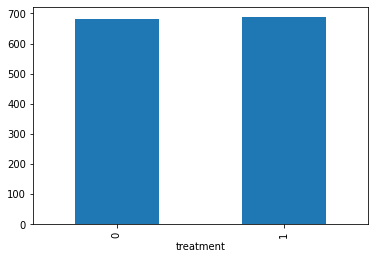

In [193]:
df2.groupby('treatment')['turnout_total'].nunique().plot(kind='bar')

plt.show()

# Section 3: REGRESSION


In [195]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
treatment_dummy = pd.get_dummies(master_data2['treatment']).iloc[:,1:]

#To get baseline estimates and we need k-1 dummies to explain

treatment_dummy

In [233]:
#Merging the dataframe with dummies of town 
merged = pd.concat([master_data2,town_dummy],axis='columns')
merged

,town_id,turnout_total,turnout_male,turnout_female,registered_total,registered_male,registered_female,treatment,treatment_phase,turnout rate,District ID,unique_id,turnout_rate_total,turnout_rate_female,172,173,175,176,177,190,191,192,193,195,196,197,198,199,200,201,208,210,211,212,213,235,236,237,238,239
1,237,240,139,101,1743,1020,723,0,2,13.769363,23,2370001,13.769363,13.969571,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,237,281,157,124,1966,1005,961,1,1,14.292981,23,2370002,14.292981,12.903226,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,237,215,104,111,1479,804,675,1,1,14.536849,23,2370003,14.536849,16.444444,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,237,271,133,138,1718,981,737,1,1,15.774156,23,2370004,15.774156,18.724559,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5,237,283,168,115,1719,959,760,0,2,16.463060,23,2370005,16.463060,15.131579,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6965,208,436,254,182,438,255,183,1,2,99.543379,17,2086965,99.543379,99.453552,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
6966,208,883,476,407,887,478,409,1,2,99.549042,17,2086966,99.549042,99.511002,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
6967,208,925,490,435,928,492,436,1,1,99.676724,17,2086967,99.676724,99.770642,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
6968,208,713,407,306,714,408,306,1,1,99.859944,17,2086968,99.859944,100.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [268]:
merged.to_csv('final_dataset.csv',index=False) #Saving the dataset

In [248]:
#now we will remove Town ID and treatment columns from our dataframe
final = merged.drop(['town_id', 'turnout_male','registered_total', 'turnout_female', 'registered_male', 'registered_female','treatment_phase', 'turnout rate',  'District ID', 'unique_id', 'turnout_rate_total', 'turnout_rate_female' ], axis='columns')
final

,turnout_total,treatment,172,173,175,176,177,190,191,192,193,195,196,197,198,199,200,201,208,210,211,212,213,235,236,237,238,239
1,240,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,281,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,215,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,271,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5,283,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6965,436,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
6966,883,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
6967,925,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
6968,713,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [249]:
X = final.drop('turnout_total', axis='columns')
X

,treatment,172,173,175,176,177,190,191,192,193,195,196,197,198,199,200,201,208,210,211,212,213,235,236,237,238,239
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6965,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
6966,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
6967,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
6968,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [250]:
y= final.turnout_total
y

1       240
2       281
3       215
4       271
5       283
       ... 
6965    436
6966    883
6967    925
6968    713
6969    563
Name: turnout_total, Length: 6948, dtype: int64

In [251]:
y= final.turnout_total
y
y= np.array(y)
print(y)

[240 281 215 ... 925 713 563]


In [252]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
X_train

,treatment,172,173,175,176,177,190,191,192,193,195,196,197,198,199,200,201,208,210,211,212,213,235,236,237,238,239
984,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3436,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1586,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4923,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2909,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3286,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1666,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2628,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [253]:
from sklearn.linear_model import LinearRegression #No need to worry about of DVT as 3 dummies included and also Backward elimination etc
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [254]:
y_pred=regressor.predict(X_test)
np.set_printoptions(precision=2)

In [255]:
y_pred

array([523.41, 521.48, 439.41, ..., 488.74, 455.94, 454.29])

In [256]:
y_test

array([363, 535, 412, ..., 217, 525, 395])

In [257]:
#to present them side to side, use concatenate function
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1)) 
#first as a tuple, and then representing vectors vertically and using 1 to cocatenate horizontally


[[523.41 363.  ]
 [521.48 535.  ]
 [439.41 412.  ]
 ...
 [488.74 217.  ]
 [455.94 525.  ]
 [454.29 395.  ]]


In [269]:
print(regressor.intercept_)               

#intercept term

390.89856414767985


In [270]:
print(regressor.coef_)

#coefficients of independent variables

#Intervention has an effect of 8.82 on the dependent variable

#From this table we can infer the fixed effects due to treatment group and town ID

[  8.82  81.14  12.87  40.68  48.52  38.56  54.57  43.12 117.61  93.44
  20.04 121.76 132.51  74.81 121.11 181.15 127.2   89.16  81.36  97.84
 135.75  44.31  27.41  34.16  65.04   9.9   70.47]


The coeffecient on the dummy variable 'treatment' gives us the difference in average turnout(total) between the control and treatment group. Average Total_Turnout in Control = 390 Average